# CSCE 623 Homework Assignment 3


### Student Name:  HOSLEY, BRANDON

### Date: April 25, 2023

### Binary Classification in 2-feature datasets

Instructions:
* Review all provided code before starting your work - this instructor has provided hints and tips throughout the code
* This assignment is composed of 2 parts
    * Load, split, and explore the data
    * Fit models and evaluate performance
* Complete the 12 numbered STEPS which contain (STUDENT CODE REQUIRED) and (STUDENT MARKDOWN RESPONSE REQUIRED) activities
* Remember to restart the kernel and rerun all cells before submitting the assignment
* Submit only the Jupyter Notebook (.ipynb) file - do not submit the datasets.

In [6]:
%load_ext ipydex.displaytools
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as col

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from IPython.display import Markdown as md

## OPTIONAL STUDENT CODE

If you need any additional imports not listed above, import them below so that the instructor is aware of what additional imports you are using

In [ ]:
#------------- START STUDENT CODE HERE -------------------

# student package import statements here if needed


#------------- END STUDENT CODE HERE -------------------


# Part 1 - Load, explore, and discuss the datasets (steps 1-7)

Each dataset is stored in a Comma Separated Value (CSV) file.  The first row is a header row.  After the first row, each row is an observation, the first 2 columns are features ("X1" and "X2" and the third column is a classification category (encoded as 0 or 1)

In this part, you will perform several actions repeatedly on each of 3 datasets to load, split, and explore the data.  



## STEP 1 (DATASET 1):  Load Dataset 1 (STUDENT CODE)

Ensure that the data sets (e.g., `dataset1.csv`) is in the same directory as your code.  Then accomplish the next two actions in the code cell below

Load the data using `pandas` function `read_csv`.   
* Use the `header` parameter to indicate row 0 as a header row
* Use the `names` parameter to name the 2 features `X1` and `X2` and the third column as `Class`
* Use the `index_col` parameter to tell the function that column 0 is the index

Use `sklearn` to partition the data into test and training sets (`df1_train` and `df1_test`):
* The sets must be of exactly equal size 
* The train and test sets must each have the *exact proportion of class distributions* which were present in the full set before the split (if the percentage was Class0 = A and Class1=B, then those same percentages must be in the training set and in the test set).

Hint1:  Loading and splitting each require only one line of code.   Instead of making up your own way of achieving the desired result, it is recommened to review the APIs and examples on the internet.

Hint2:  If you are using loops, breaking things apart then joining them back together, counting class memberships or doing other things besides a single call to the appropriate package, then you are probably being inefficient.



In [15]:
# STEP 1

df1 = None #placeholder to load the dataframe in
df1_train = pd.DataFrame() #placeholder for training set partition
df1_test = pd.DataFrame() #placeholder for test set partition
randstate = 42

#------------- START STUDENT CODE HERE -------------------

df1 = pd.read_csv('dataset1.csv', header=0, index_col=0, names=['X1', 'X2', 'Class'])
df1.head() 
df1_train[['X1', 'X2']], df1_test[['X1', 'X2']], df1_train['Class'], df1_test['Class'] =\
    train_test_split(df1[['X1', 'X2']], df1['Class'], test_size=0.5)

#------------- END STUDENT CODE HERE -------------------

## STEP 2: Create a reusable function for data exploration (STUDENT CODE)

Create a `data_explore` function to 

* display statistics about the data (using pandas `describe()` on *each* feature)
* describe the covariance of *each* Class (0 and 1) using `.cov`

* Make a Pairplot with class-selected colors
    * use Seaborn (`sns`) to create a `pairplot` of the dataset
    * make sure to use the `pairplot` function call attribute `hue` to make the color of the histogram created from a set of observations be associated with its class    

* Make a set of histograms using pandas
    * for each class (0 and 1) create a pandas histogram (`hist`) of each feature (using the default hist colors)



In [38]:
#STEP 2

def data_explore(df):
    
    #------------- START STUDENT CODE HERE -------------------
    print(df.describe(include='all'))
    print('Covariance of Class 0:\n', df[['X1', 'X2']].where(df['Class']==0).cov())
    print('Covariance of Class 1:\n', df[['X1', 'X2']].where(df['Class']==1).cov())
    sns.pairplot(df, hue='Class')
    df[['X1', 'X2']].where(df['Class']==0).plot.hist(title='Features of Class 0', alpha=0.5)
    df[['X1', 'X2']].where(df['Class']==1).plot.hist(title='Features of Class 1', alpha=0.5)
    #------------- END STUDENT CODE HERE -------------------

### Explore the training set from the first dataset (instructor code) 

Using only the training data, this code calls the function created above - the `data_explore` function.


               X1          X2       Class
count  300.000000  300.000000  300.000000
mean     0.763922    0.481139    0.513333
std      0.364433    0.292843    0.500657
min      0.007884    0.000546    0.000000
25%      0.547604    0.235651    0.000000
50%      0.745978    0.458737    1.000000
75%      0.982876    0.716297    1.000000
max      1.499809    0.997994    1.000000
Covariance of Class 0:
           X1        X2
X1  0.080771 -0.003872
X2 -0.003872  0.087572
Covariance of Class 1:
           X1        X2
X1  0.079148  0.011011
X2  0.011011  0.084141


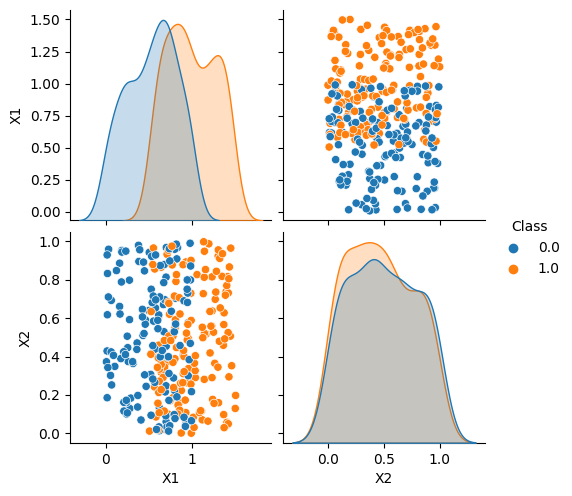

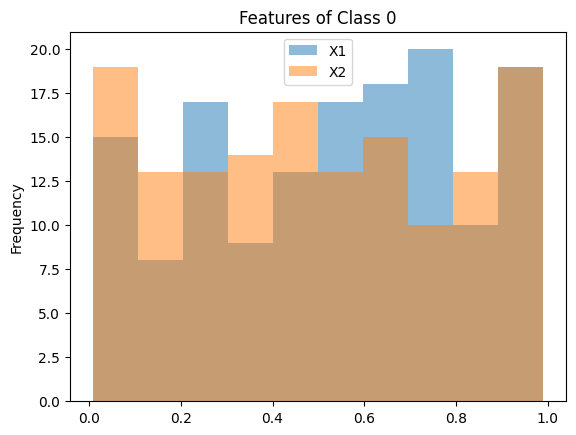

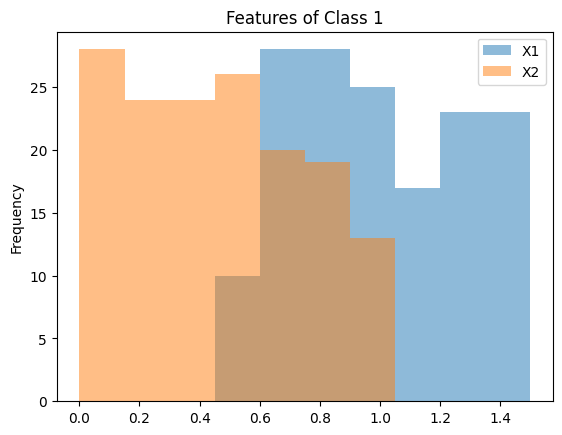

In [39]:
data_explore(df1_train)

## STEP 3 (DATASET 1): Discussion (STUDENT MARKDOWN RESPONSE REQUIRED)

In the markdown cell below, describe the data attributes you noticed during exploration of the training set 1.   

In particular, focus on the attributes which may facilitate classification or make classification of the data more challenging.  Hint:  look for differences in the statistics between classes.  Note that some differences might be for a specific features while other differences might involve both features.

<font color='green'>STUDENT ANSWER BELOW</font>   

In the case of class one, there is a significantly lower overlap in the values of the two features. Additionally, when the two features are taken together, approximately half of each class can be reliably distinquished, the other half exist in an overlapping region. 

## STEP 4 (DATASET 2):  Load, Split and Explore Dataset 2 (STUDENT CODE)

Follow the steps on Dataset 2 as you did for Dataset 1.  Remember to only explore the training set (not the test set)
* Load the CSV for `dataset2.csv`
* Split the test and train data (stratified by class, with equal portions of the data going to each set)
* Call `data_explore` to explore the data

               X1          X2       Class
count  300.000000  300.000000  300.000000
mean     0.494390    0.496194    0.496667
std      0.884174    0.561043    0.500824
min     -2.528299   -0.847026    0.000000
25%     -0.044810    0.038107    0.000000
50%      0.502945    0.513855    0.000000
75%      1.080572    0.973925    1.000000
max      2.976019    1.615093    1.000000
Covariance of Class 0:
           X1        X2
X1  0.658597  0.180588
X2  0.180588  0.104031
Covariance of Class 1:
           X1        X2
X1  0.569353  0.145980
X2  0.145980  0.087176


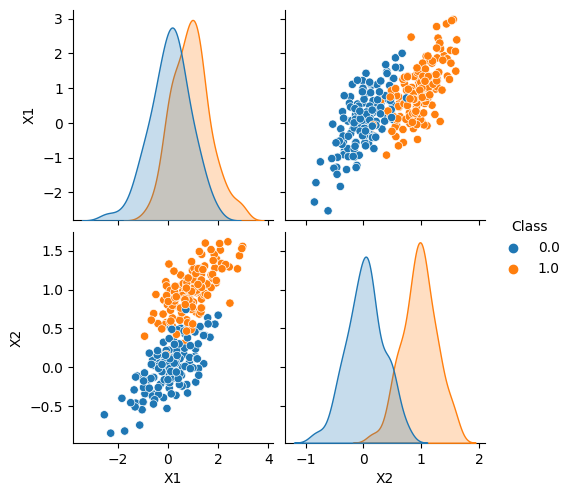

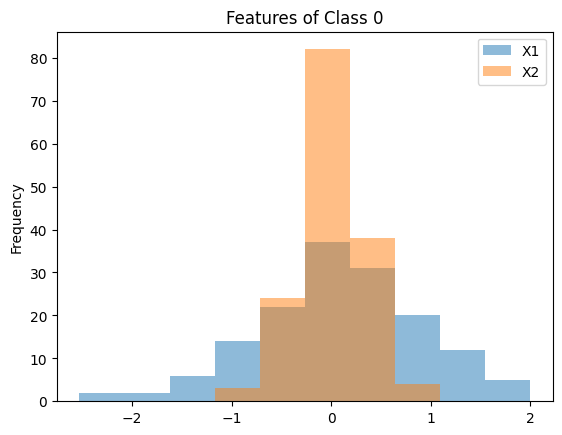

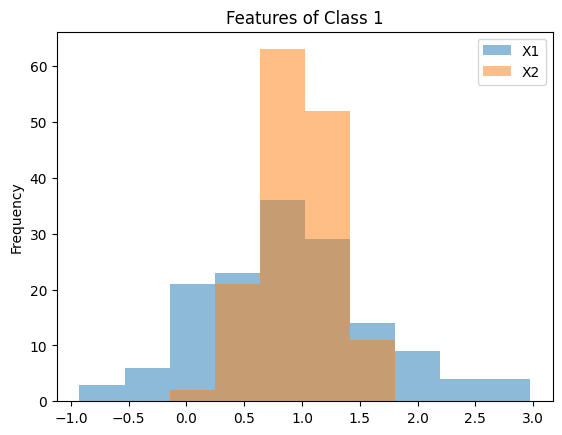

In [40]:
# STEP 4

#------------- START STUDENT CODE HERE -------------------
df2_train = pd.DataFrame() #placeholder for training set partition
df2_test = pd.DataFrame() #placeholder for test set partition

df2 = pd.read_csv('dataset2.csv', header=0, index_col=0, names=['X1', 'X2', 'Class'])
df2.head() 
df2_train[['X1', 'X2']], df2_test[['X1', 'X2']], df2_train['Class'], df2_test['Class'] =\
    train_test_split(df2[['X1', 'X2']], df2['Class'], test_size=0.5)

data_explore(df2_train)

#------------- END STUDENT CODE HERE -------------------


## STEP 5 (DATASET 2): Discussion (STUDENT MARKDOWN CELL)

In the markdown cell below, describe the data attributes you noticed during exploration of the training set 2.   

In particular, focus on the attributes which may facilitate classification or make classification of the data more challenging.  Hint:  look for differences in the statistics between classes.  Note that some differences might be for a specific features while other differences might involve both features.

<font color='green'>STUDENT ANSWER BELOW</font>   

In this situation the features are nearly indistinguishable between the two classes when taken alone,
when both features are taken together, the two classes have notable separations.

## STEP 6 (DATASET 3): Load, Split and Explore Dataset 3  (STUDENT CODE)

Follow the steps on Dataset 2 as you did for Dataset 1.  Remember to only explore the training set (not the test set)
* Load the CSV for `dataset3.csv`
* Split the test and train data (stratified by class, with equal portions of the data going to each set)
* Call `data_explore` to explore the data

               X1          X2       Class
count  300.000000  300.000000  300.000000
mean     0.547641    1.659499    0.503333
std      3.798461    4.255553    0.500824
min    -13.862964  -10.529514    0.000000
25%     -1.173684   -1.113163    0.000000
50%      1.066031    0.896373    1.000000
75%      2.735163    3.943896    1.000000
max     11.283617   19.109731    1.000000
Covariance of Class 0:
            X1        X2
X1  24.089205  6.952745
X2   6.952745  6.187434
Covariance of Class 1:
           X1         X2
X1  3.482668  -2.280507
X2 -2.280507  24.064866


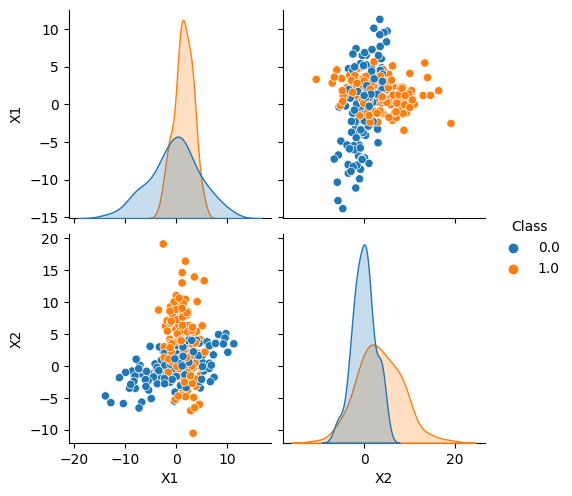

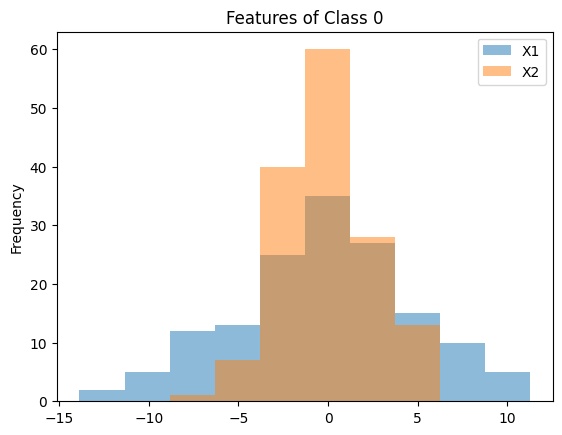

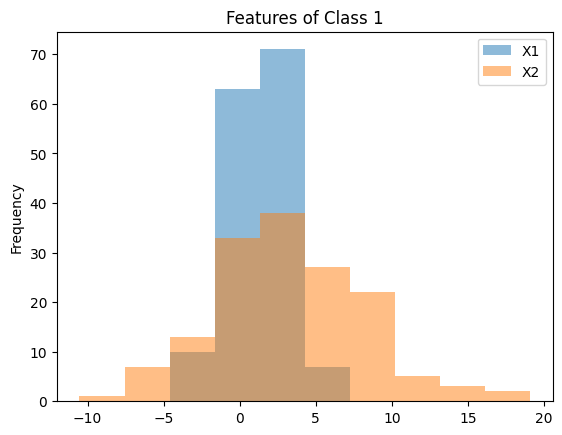

In [63]:
#STEP 6

#------------- START STUDENT CODE HERE -------------------

df3_train = pd.DataFrame() #placeholder for training set partition
df3_test = pd.DataFrame() #placeholder for test set partition

df3 = pd.read_csv('dataset3.csv', header=0, index_col=0, names=['X1', 'X2', 'Class'])
df3.head() 
df3_train[['X1', 'X2']], df3_test[['X1', 'X2']], df3_train['Class'], df3_test['Class'] =\
    train_test_split(df3[['X1', 'X2']], df3['Class'], test_size=0.5)

data_explore(df3_train)

#------------- END STUDENT CODE HERE -------------------


## STEP 7 (DATASET 3): Discussion (STUDENT MARKDOWN CELL)

In the markdown cell below, describe the data attributes you noticed during exploration of the training set.   

In particular, focus on the attributes which may facilitate classification or make classification of the data more challenging.  Hint:  look for differences in the statistics between classes.  Note that some differences might be for a specific features while other differences might involve both features.


<font color='green'>STUDENT ANSWER BELOW</font>   

In this dataset, the classes are more separable than in previous, datasets. While there is still a notable overlapping region; each class has a distinct distribution with each feature.


# PART 2 - Fitting Classification Models & Reporting Performance on the Test Set  (steps 8-12)


In this part, you will perform step 8 to obtain classification performance (accuracy) for each model on each of the datasets.

Then in steps 9-11 you will focus on dataset 3 to produce confusion matrices and ROC curves on just dataset 3

Finally, in step 12 you will draw some conclusions about the performance of the models and make recommendations.



### Fitting Classifiers (INSTRUCTOR-PROVIDED CODE)

In this code, we use a function to train 3 models (Logistic Regression, Linear Discriminant Analysis, and Quadratic Discriminant Analysis) on each of the three datasets (9 models total).  

In [64]:
def build_classifiers(data):
    X = data.loc[:,['X1', 'X2']]
    y = data.Class
    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X, y)
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)
    
    return {'Logistic_Regression':log_reg, 'LDA':lda, 'QDA':qda}

In [65]:
models1 = build_classifiers(df1_train)  #contains one model for each type of classifier on dataset 1
models2 = build_classifiers(df2_train)
models3 = build_classifiers(df3_train)

The models are returned in a python dictionary can be accessed using the (key, model) accessors like these examples:
* `models1['Logistic_Regression']` returns the Logistic Regression model that was fit on dataset 1
* `models3['LDA']` returns the LDA model that was fit on dataset 3
* `models2['QDA']` returns the QDA model that was fit on dataset 2

Recall that 
* the Logistic Regression model is `sklearn.linear_model.LogisticRegression.fit()`
* the LDA model was fit using `sklearn.discriminant_analysis.LinearDiscriminantAnalysis.fit()`
* the QDA model was fit using `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.fit()


For each dataset, for each model, determine the class prediction probabilities using `.predict_proba()` on the features from the dataset provided to the function (X)

## STEP 8:  Determining classifier Accuracy (STUDENT CODE REQUIRED)

For each of the models above, for each test dataset, report Accuracy on the test set:

Report this in a table format by storing the values in the columns and rows of a new dataframe and then displaying the dataframe
* use a separate row for each dataset
* use a separate column for each model's performance

Hint:  use `sklearn.metrics.accuracy_score` for this activity


In [66]:
#STEP 8

accdf = pd.DataFrame() #placeholder for the dataframe which will contain performance scores

#------------- START STUDENT CODE HERE -------------------

sets = [[models1, df1_test], [models2, df2_test], [models3, df3_test]]
classifiers = ['Logistic_Regression', 'LDA', 'QDA']

for c in classifiers:
    scores = []
    for s in sets:
        scores.append( accuracy_score(s[1]['Class'], s[0][c].predict(s[1][['X1', 'X2']])) )
    accdf[c] = scores

#------------- END STUDENT CODE HERE -------------------

accdf.head()
        

,Logistic_Regression,LDA,QDA
0,0.790000,0.790000,0.786667
1,0.943333,0.936667,0.940000
2,0.726667,0.730000,0.806667


## STEP 9:  Confusion Matrix (STUDENT CODE REQUIRED)

In Dataset 3, there was a meaningful difference in performance between the models.  

For each model (logistic regression, LDA, QDA), create a confusion matrix of its performance on test dataset 3
* Tip:  use `sklearn` `ConfusionMatrixDisplay`
* The True label should identify the rows of the matrix while the predicted label identifies the columns
* Ensure each matrix is properly titled with the name of the model used to create it

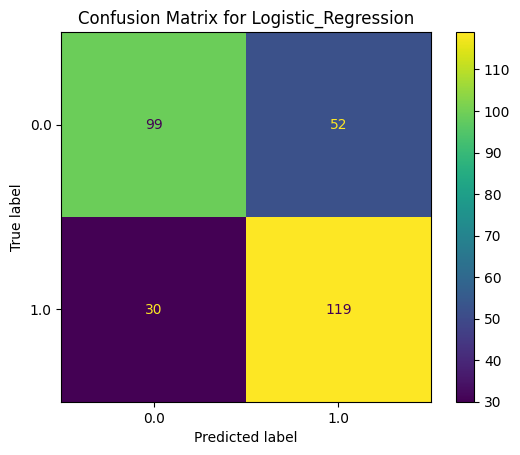

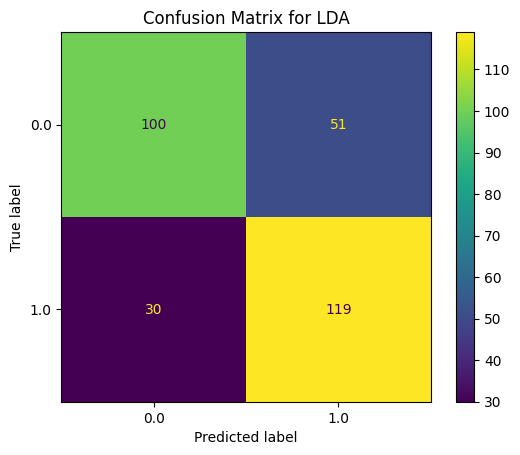

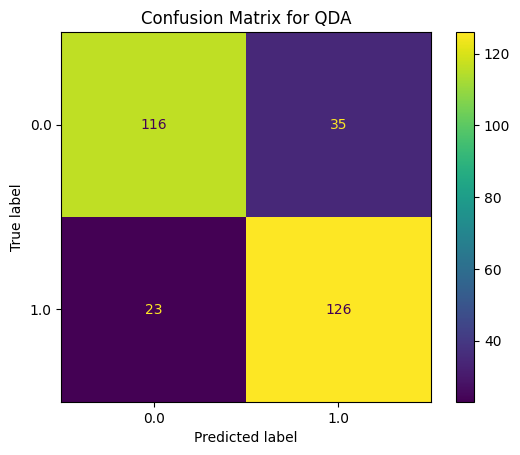

In [74]:
# STEP 9

#------------- START STUDENT CODE HERE -------------------

for c in classifiers:
    cmd = ConfusionMatrixDisplay.from_estimator(models3[c], df3_test[['X1', 'X2']], df3_test['Class'])
    cmd.ax_.set_title(f'Confusion Matrix for {c}')

#------------- END STUDENT CODE HERE -------------------


### Function to use a classifier to estimate class probabilities on a dataset (INSTRUCTOR PROVIDED CODE)

In later code cells this function will be called with each dataset and the 3 models used to fit models to that dataset. It relies on the `sklearn` model's `.predicte_proba` function.  

In [75]:
def predict_probs(models, X):
    """ Returns a dictionary of predicted proability vectors using models stored in the input dictionary 'models' on the feature data 'X'
    params:  
    models - a dictionary of fitted classification models with key equal to the name of the model
    X - the values of a dataset obtained"""
    predicts = {}
    
    for key, model in models.items():
        predicts[key] = model.predict_proba(X)
    return predicts

## STEP 10: Call the `predict_probs` function to estimate class probabilities on each test set (STUDENT CODE REQUIRED)

Using the instructor-provided `predict_probs(models, X)` function, obtain the dictionary of predicitons of each classifier on the results of each of the 3 test datasets.  

Store the returned dictionary of predictions in `predicts1`, `predicts2`, and `predicts3` (1 dictionary per dataset)

Hint:  to obtain the parameter `X` for the input value to the function, use the `pandas` dataframe accessor `datasetname.loc[:,['X1','X2']]` where `datasetname` is the name of a test set dataframe like `df1_test`


In [77]:
#STEP 10

predicts1 = {} #placeholder for predictions of each of the three models on test dataset 1
predicts2 = {} #placeholder for predictions of each of the three models on test dataset 2
predicts3 = {} #placeholder for predictions of each of the three models on test dataset 3

#------------- START STUDENT CODE HERE -------------------

predicts1 = predict_probs(models1, df1_test[['X1', 'X2']])
predicts2 = predict_probs(models2, df2_test[['X1', 'X2']])
predicts3 = predict_probs(models3, df3_test[['X1', 'X2']])

#------------- END STUDENT CODE HERE -------------------


In [78]:
# instructor code  - spot check model predictions
print("logistic regression\n", predicts1["Logistic_Regression"][0:5] )
print("LDA\n",predicts3["LDA"][0:5] )
print("QDA\n",predicts2["QDA"][0:5] )

#'Logistic_Regression':log_reg, 'LDA':lda, 'QDA':qda

logistic regression
 [[0.84916171 0.15083829]
 [0.36467064 0.63532936]
 [0.72448575 0.27551425]
 [0.27722344 0.72277656]
 [0.93106552 0.06893448]]
LDA
 [[0.12018891 0.87981109]
 [0.49527488 0.50472512]
 [0.76452625 0.23547375]
 [0.28704038 0.71295962]
 [0.66545077 0.33454923]]
QDA
 [[2.51131166e-03 9.97488688e-01]
 [3.24492022e-04 9.99675508e-01]
 [9.99834693e-01 1.65307473e-04]
 [9.57611870e-01 4.23881303e-02]
 [9.99851285e-01 1.48715102e-04]]


## STEP 11:  Create ROC Curves for each test dataset (STUDENT CODE REQUIRED)

For each of the three test datasets, display a single ROC curve with each of the three model performances on it.  You should show one graph per dataset, and on each graph, include the ROCs for each of the three models on the graph, using colored lines with legends.

Each graph should have:
* A title which includes the name of the dataset
* The horizontal axis label should contain the words "False Positive Rate"
* The vertical axis label should contain the words "True Positive Rate"
* One ROC line per model, with the legend appropriately named

Assume that Class "1" is the postive class for this activity

Hint:  See `sklearn.metrics` `RocCurveDisplay.from_predictions` which will provide the curves and the AUC for each ROC line.  To use this, you will need to provide 
* The correct class for each observation, as contained in the test dataset 'Class' column. 
* The probabilities for the positive class obtained from the `predict_probs` of the model of interest.  This is located in column index = 1  (the right column)
* The `pos_label` Class identifier - which is 1 since we are assuming 1 is the positive class
* The `name` for the ROC line which should be a descriptive name of the classfier model used to produce the line


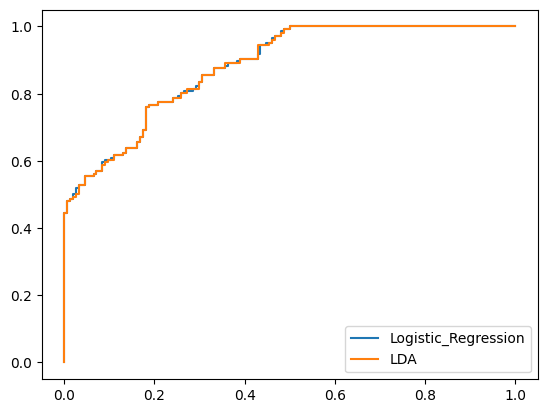

In [107]:
# rcd = RocCurveDisplay.from_predictions(df1_test['Class'], predicts1["Logistic_Regression"][:,1])
# rcd = RocCurveDisplay.from_predictions(df1_test['Class'], predicts1["LDA"][:,1])
# rcd.ax_.set_title(f'Roc Curve for')
plt.figure(0).clf()
fpr, tpr, _ = roc_curve(df1_test['Class'], predicts1["Logistic_Regression"][:,1])
plt.plot(fpr,tpr,label='Logistic_Regression')
fpr, tpr, _ = roc_curve(df1_test['Class'], predicts1["LDA"][:,1])
plt.plot(fpr,tpr,label='LDA')
plt.legend(loc='lower right')

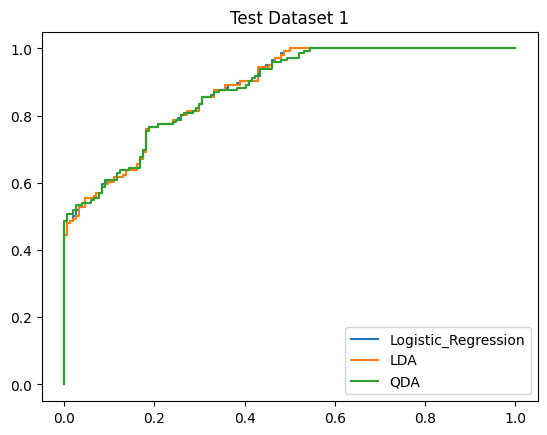

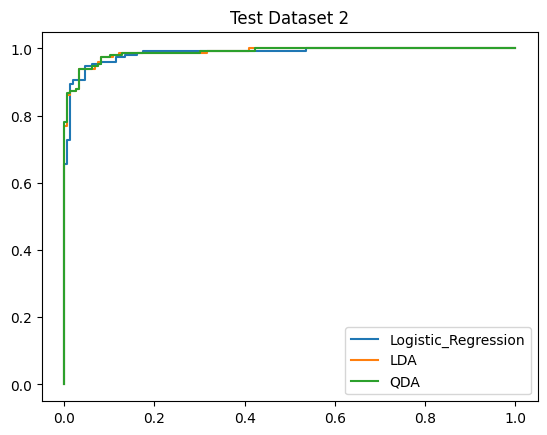

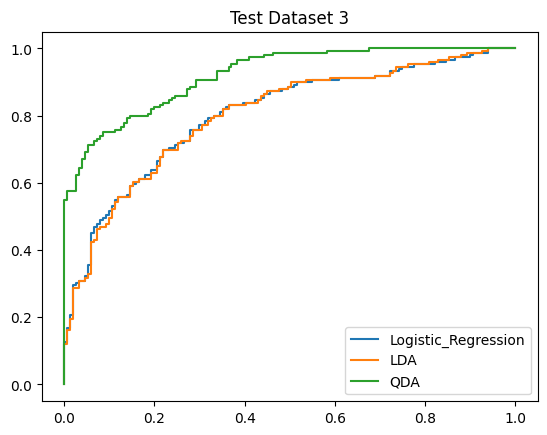

In [109]:
#STEP 11

# model names:  'Logistic_Regression':log_reg, 'LDA':lda, 'QDA':qda

for test_predicts, test_dataset, df_names in zip([predicts1, predicts2, predicts3],[df1_test,df2_test,df3_test],['Test Dataset 1','Test Dataset 2', 'Test Dataset 3']):
    
    #------------- START STUDENT CODE HERE -------------------
    plt.figure(0).clf()
    fpr, tpr, _ = roc_curve(test_dataset['Class'], test_predicts["Logistic_Regression"][:,1])
    plt.plot(fpr,tpr,label='Logistic_Regression')
    fpr, tpr, _ = roc_curve(test_dataset['Class'], test_predicts["LDA"][:,1])
    plt.plot(fpr,tpr,label='LDA')
    fpr, tpr, _ = roc_curve(test_dataset['Class'], test_predicts["QDA"][:,1])
    plt.plot(fpr,tpr,label='QDA')
    
    plt.title(df_names)
    plt.legend(loc='lower right')
    plt.show()
    #------------- END STUDENT CODE HERE -------------------

    

## STEP 12 - Conclusions from the ROC Curves (STUDENT MARKDOWN RESPONSE REQUIRED)

Review the ROC Curves resulting from step 11 and answer the following quesions:

Q1:  For which datasets (1, 2, and 3) does it matter which model we choose to make predictions, and what evidence supports this?
Q2:  For the dataset(s) which matter(s) (from the set {1,2,3}), which models are the best to choose, and why?

<font color='green'>STUDENT ANSWER Q1 BELOW</font>   

The choice of the model seems only to matter in the case of dataset three, as the other two datasets have nearly the same placement on all of the curves, three has notable separation.

<font color='green'>STUDENT ANSWER Q2 BELOW</font>   

The QDA model performs significantly better than the others. This can be seen by the higher area under the ROC curve, suggesting better performance at difference thresholds.